In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

## Crochet chart for Surface of revolution

If you want to match an actual volume, the length unit (=s) is the stich length
Inputs parameters are:
 - y: profile as a function of variable x with A parameter (other parameters can be defined)
 - x_0: starting value of the x variable
 - x_1: end value for the x variable
 
 the steps along the x axis are taken to have stitch length along the curve. So this code do not handle curve with $\inf$ derivative (that's why the sphere boudary starts at -9.95 and not -10)
 Note also that due to the axial symetry the maximum change in on rank is +-2pi (with the rounding the change is in $[-7,7]$) a constant maximal change leading to a disk. 

### Surface definition

In [2]:
s = sp.Symbol('s')
x = sp.Symbol('x')
A = sp.Symbol('A')

    
# profile
y = A/x
#boudary
x_0 = 0.5
x_1 = 10

# auxiliary function
x_step = s/(y.diff(x)**2+1)**0.5

### Computation of the stitches number

In [3]:
x_curr = x_0
rank_radius = []
x_points = []

while x_curr < x_1:
    rank_radius.append(y.subs([(A, 10), (x, x_curr)]))
    x_points.append(x_curr)
    x_curr += x_step.subs([(A, 10), (x, x_curr), (s,1)])
    
rank_length = np.array([2*np.pi*np.array(dm) for dm in rank_radius])

### Stitch plan :

In [4]:
# little function for pretty print
def pad_left(st, nb):
    return (' '*nb+st)[-nb:]

In [5]:
number_stitch = [ int(rl) for rl in np.round(rank_length.astype(float))]
nb_curr = 0
print('Rank, Stitches, Change')
for rk in range(len(number_stitch)):
    print(pad_left(str(rk+1),4)+', '+pad_left(str(number_stitch[rk]),8)+', '+pad_left(str(number_stitch[rk]-nb_curr),6))
    nb_curr = number_stitch[rk]

Rank, Stitches, Change
   1,      126,    126
   2,      120,     -6
   3,      114,     -6
   4,      108,     -6
   5,      102,     -6
   6,       96,     -6
   7,       90,     -6
   8,       84,     -6
   9,       78,     -6
  10,       73,     -5
  11,       67,     -6
  12,       61,     -6
  13,       55,     -6
  14,       50,     -5
  15,       44,     -6
  16,       39,     -5
  17,       34,     -5
  18,       29,     -5
  19,       24,     -5
  20,       20,     -4
  21,       16,     -4
  22,       13,     -3
  23,       11,     -2
  24,        9,     -2
  25,        8,     -1
  26,        7,     -1
  27,        7,      0


In [6]:
with open('pattern.csv', 'w') as f:
    nb_curr = 0
    f.write('Rank,Stitches,Change')
    for rk in range(len(number_stitch)):
        f.write(str(rk+1)+','+str(number_stitch[rk])+','+str(number_stitch[rk]-nb_curr))
        nb_curr = number_stitch[rk]
    

### Visual check

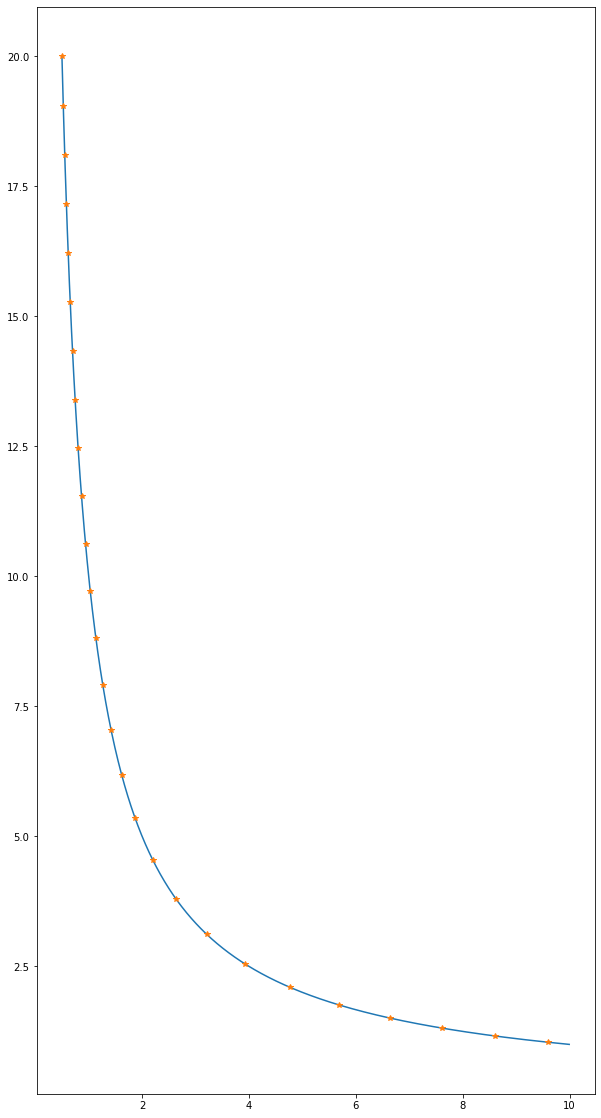

In [7]:
N=100
xs = x_0+np.array(range(int(np.round((x_1-x_0)*N))))/N 
ys = [y.subs([(A, 10), (x, xx)]) for xx in xs]

ratio = (np.max(ys)-np.min(ys))/(x_1-x_0)

plt.rcParams['figure.figsize'] = [10, 10*ratio]

plt.plot(xs,ys)
plt.plot(x_points, rank_radius, '*')



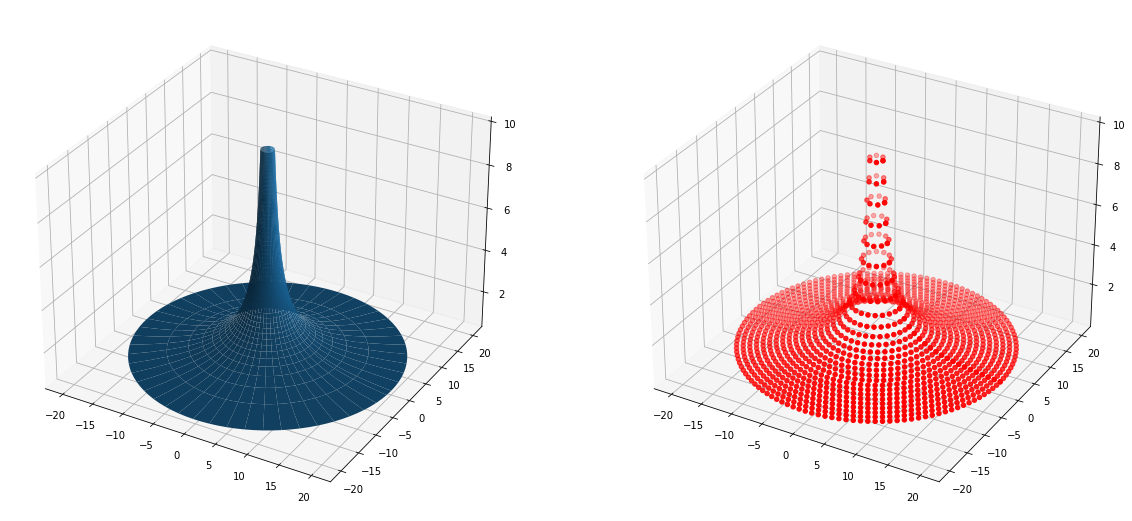

In [8]:
z=np.linspace(x_0,x_1,N)
r= np.array([y.subs([(A, 10), (x, zn)]) for zn in z]).astype(float)
phi=np.linspace(0,2*np.pi,100)

Z, P = np.meshgrid(z, phi)
X, Y = r*np.cos(P), r*np.sin(P)


plt.rcParams['figure.figsize'] = [20, 10]
fig=plt.figure()
ax = plt.subplot(121, projection='3d')            
ax.plot_surface(X, Y, Z)

ax = plt.subplot(122, projection='3d')  
for index in range(len(rank_radius)):
    radius=rank_radius[index]
    pos=x_points[index]
    nb_st=number_stitch[index]
    theta = np.linspace(0,2*np.pi,nb_st)
    xs=radius*np.cos(theta)
    ys=radius*np.sin(theta)
    zs=np.ones(nb_st)*pos
    ax.scatter(xs,ys,zs,marker='o',color='r')